In [1]:
from planetx_game.db_ops import query
from planetx_game.game import *
import matplotlib.pyplot as plt

In [16]:
rows = query("SELECT * FROM games WHERE board_size = 18 LIMIT 10000;")

In [17]:
def row_to_game(row):
    gid, game_code, board_size, board_objects, research, conference, starting_information = row
    game = Game(Board.parse(board_objects), StartingInformation.parse(starting_information), 
                Research.parse(research), Conference.parse(conference))
    return game

In [18]:
games = [row_to_game(row) for row in rows]

In [19]:
counts = {
    obj: []
    for obj in SpaceObject
}

In [20]:
for game in games:
    for equinox in game.starting_info.clues:
        e_counts = { obj: 0 for obj in SpaceObject }
        for clue in game.starting_info.clues[equinox]:
            e_counts[clue.eliminated_obj] += 1
        for obj in SpaceObject:
            counts[obj].append(e_counts[obj])

In [21]:
counts.keys()

dict_keys([<empty sector>, <comet>, <asteroid>, <dwarf planet>, <Planet X>, <gas cloud>, <black hole>])

In [22]:
obj = SpaceObject.
binwidth = 1
data = counts[obj]
bins=range(min(data), max(data) + binwidth, binwidth)

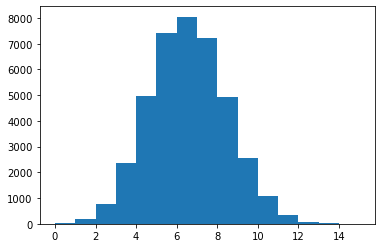

In [23]:
plt.hist(data, bins=bins)
plt.show()